In [12]:
import numpy as np
import matplotlib.pyplot as plt
import starry

starry.config.lazy = False
starry.config.quiet = True

In [ ]:
# importing the data into arrays
# first column of the data file is phase data
TessPhaseHalf = np.loadtxt("GD356allTess.dat", usecols=(0))
TessPhase = np.concatenate((TessPhaseHalf, TessPhaseHalf+1))
# second column of the data file is flux data
TessFluxHalf = np.loadtxt("GD356allTess.dat", usecols=(1))
TessFlux = np.concatenate((TessFluxHalf+1, TessFluxHalf+1))
# third column of the data file is flux error
TessErrorHalf = np.loadtxt("GD356allTess.dat", usecols=(2))
TessError = np.concatenate((TessErrorHalf, TessErrorHalf))

In [ ]:
def mean_data(Phase, Flux, Error, bins):

    Phase_split = np.array_split(Phase, bins)
    Flux_split = np.array_split(Flux, bins)
    Error_split = np.array_split(Error, bins)

    meanPhase = [] * bins
    meanFlux = [] * bins
    meanError = [] * bins

    for i in range(bins):

        meanPhase_i = np.mean(Phase_split[i])
        meanFlux_i = np.sum(Flux_split[i] / (Error_split[i]**2))/ np.sum(1/(Error_split[i]**2))

        meanError_i = np.sqrt(1/np.sum(1/(Error_split[i]**2)))

        meanPhase.append(meanPhase_i)
        meanFlux.append(meanFlux_i)
        meanError.append(meanError_i)
        
    return meanPhase, meanFlux, meanError

meanPhase, meanFlux, meanError = mean_data(TessPhase, TessFlux, TessError, 200)


plt.figure()
plt.figure(figsize=(12, 5))
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

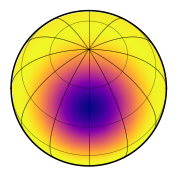

In [9]:
contrast = 0.25
radius = 15
map = starry.Map(ydeg=5)
map.spot(contrast=contrast, radius=radius, lat=45)
map.inc = 30.0
map.show()

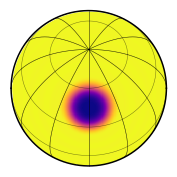

In [11]:
contrast = 0.25
radius = 15
map = starry.Map(ydeg=30)
map.spot(contrast=contrast, radius=radius, lat=45)
map.inc = 30.0
map.show()

In [10]:
theta = np.multiply(meanPhase, 360)
plt.figure(figsize=(12, 5))

amplitude = (np.amax(map.flux(theta=theta)) - np.amin(map.flux(theta=theta)))/2
mean = np.mean(map.flux(theta=theta))

plt.plot(meanPhase, map.flux(theta=theta), label='Starry Light Curve')
plt.plot(meanPhase, amplitude*np.sin((theta*np.pi/180) - 0.5*np.pi) + mean, label='Sine Wave', linestyle='--')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux [normalized]", fontsize=20);

NameError: name 'meanPhase' is not defined

In [93]:
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

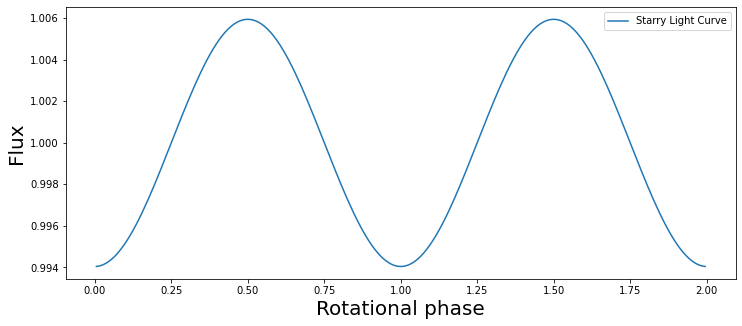

In [94]:
plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20);

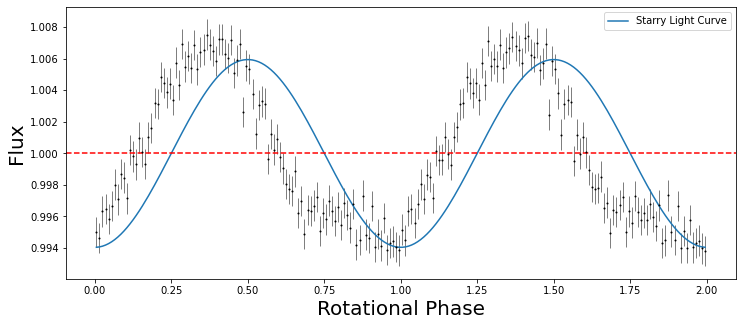

In [95]:
plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--');

In [97]:
N = int(len(meanFlux)/5)
difference_array = np.absolute(np.subtract(meanFlux[:N],1)) 
index = difference_array.argmin()

contrast = 0.25
radius = 15
map = starry.Map(ydeg=30)
map.spot(contrast=contrast, radius=radius, lat=45, lon= meanPhase[index] * 180)
map.inc = 30.0

27.912480058706464

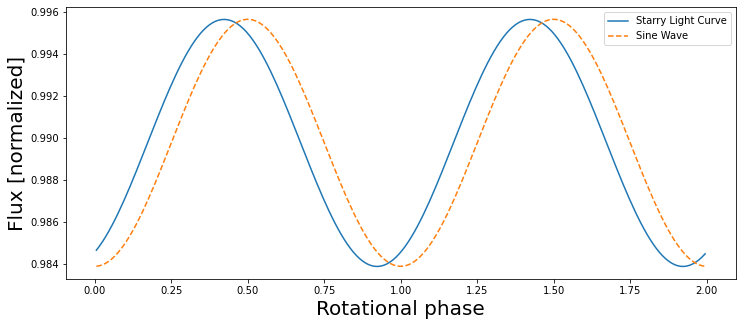

In [98]:
theta = np.multiply(meanPhase, 360)
plt.figure(figsize=(12, 5))

amplitude = (np.amax(map.flux(theta=theta)) - np.amin(map.flux(theta=theta)))/2
mean = np.mean(map.flux(theta=theta))

plt.plot(meanPhase, map.flux(theta=theta), label='Starry Light Curve')
plt.plot(meanPhase, amplitude*np.sin((theta*np.pi/180) - 0.5*np.pi) + mean, label='Sine Wave', linestyle='--')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux [normalized]", fontsize=20);

meanPhase[index] * 180

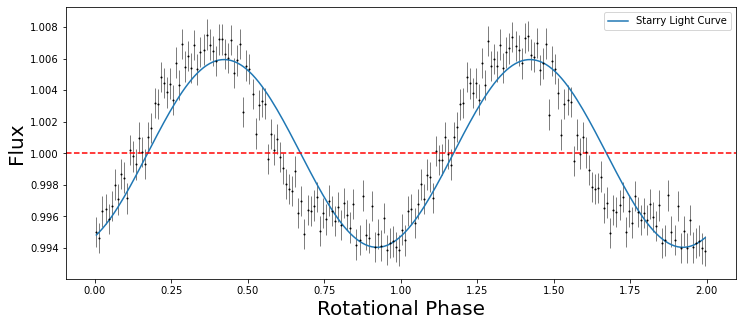

In [99]:
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--');

In [21]:
radius = 15

guess_phase = np.linspace(-90, 90, 181, endpoint=True)
guess_contrast = np.linspace(0, 1, 101, endpoint=True)


min_chi = 10000


In [23]:
chi = []

for phase in guess_phase:
        
    map = starry.Map(ydeg=30)
    map.spot(contrast=0.25, radius=radius, lat=45, lon=phase)
    map.inc = 30.0
    median = np.median(map.flux(theta=theta))
    newFlux = map.flux(theta=theta)/median
    
    residuals = (meanFlux - newFlux)/meanError
    chi_squared = np.sum(residuals**2)
    
    chi.append(chi_squared)
    
    if abs(chi_squared) < abs(min_chi):
        min_chi = chi_squared
        best_phase = phase

best_phase

45.0

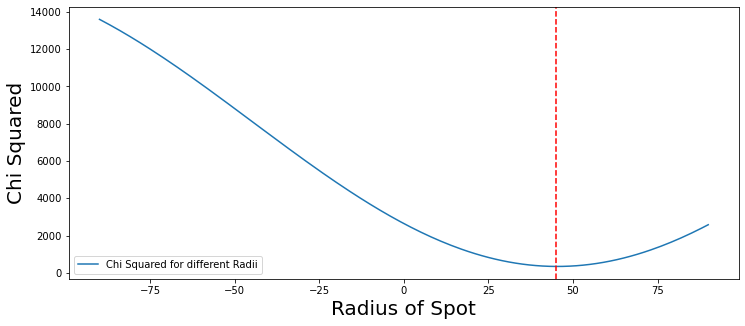

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(guess_phase, chi, label='Chi Squared for different Longitudes')
plt.xlabel("Longitude of Spot", fontsize=20)
plt.legend()
plt.ylabel("Chi Squared", fontsize=20)
plt.axvline(x=best_phase, color='r', linestyle='--');

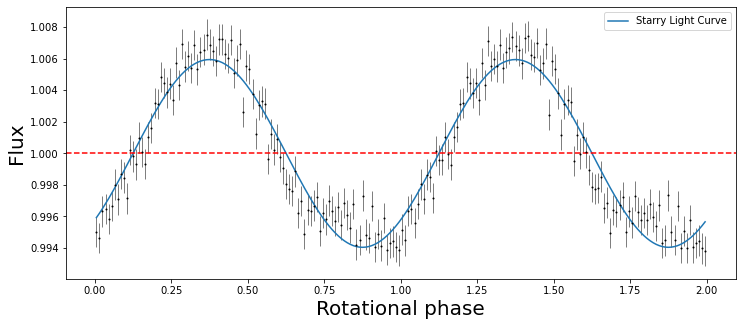

In [26]:
map = starry.Map(ydeg=30)
map.spot(contrast=0.25, radius=radius, lat=45, lon=best_phase)
map.inc = 30.0
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.axhline(y=1, color='r', linestyle='--');

In [27]:
min_chi

339.51871724982766

In [28]:
chi = []

for contrast in guess_contrast:
        
    map = starry.Map(ydeg=30)
    map.spot(contrast=contrast, radius=radius, lat=45, lon=best_phase)
    map.inc = 30.0
    median = np.median(map.flux(theta=theta))
    newFlux = map.flux(theta=theta)/median
    
    residuals = (meanFlux - newFlux)/meanError
    chi_squared = np.sum(residuals**2)
    
    chi.append(chi_squared)
    
    if abs(chi_squared) <= abs(min_chi):
        min_chi = chi_squared
        best_contrast = contrast

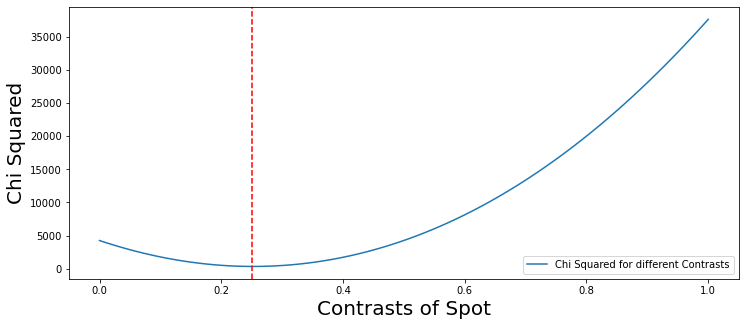

In [29]:
plt.figure(figsize=(12, 5))
plt.plot(guess_contrast, chi, label='Chi Squared for different Contrasts')
plt.xlabel("Contrasts of Spot", fontsize=20)
plt.legend()
plt.ylabel("Chi Squared", fontsize=20)
plt.axvline(x=best_contrast, color='r', linestyle='--');

In [30]:
best_contrast

0.25

In [31]:
min_chi

339.51871724982766

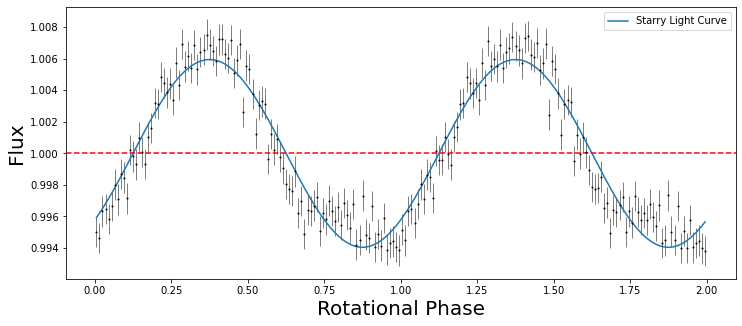

In [32]:
map = starry.Map(ydeg=30)
map.spot(contrast=best_contrast, radius=radius, lat=45, lon=best_phase)
map.inc = 30.0
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--');

In [100]:
radius = 15

guess_phase = np.linspace(45-0.5, 45+0.5, 11, endpoint=True)
guess_contrast = np.linspace(0.25 - 0.005, 0.25 + 0.005, 11, endpoint=True)

min_chi = 10000

In [101]:
chi = []

for phase in guess_phase:

    map = starry.Map(ydeg=30)
    map.spot(contrast=0.25, radius=radius, lat=45, lon=phase)
    map.inc = 30.0
    median = np.median(map.flux(theta=theta))
    newFlux = map.flux(theta=theta)/median

    residuals = (meanFlux - newFlux)/meanError
    chi_squared = np.sum(residuals**2)
    
    chi.append(chi_squared)
    
    if abs(chi_squared) < abs(min_chi):
        min_chi = chi_squared
        best_phase = phase        


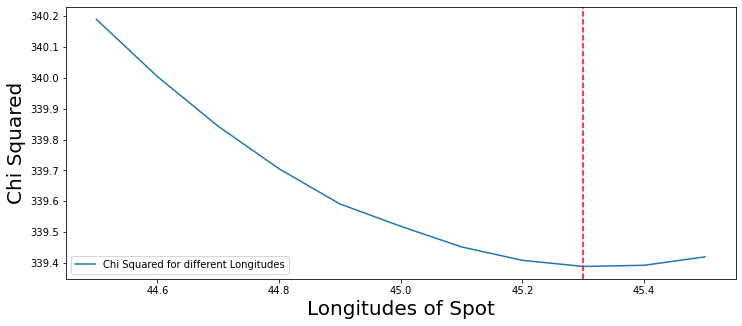

In [102]:
plt.figure(figsize=(12, 5))
plt.plot(guess_phase, chi, label='Chi Squared for different Longitudes')
plt.xlabel("Longitudes of Spot", fontsize=20)
plt.legend()
plt.ylabel("Chi Squared", fontsize=20)
plt.axvline(x=best_phase, color='r', linestyle='--');

In [103]:
chi = []

for contrast in guess_contrast:

    map = starry.Map(ydeg=30)
    map.spot(contrast=contrast, radius=radius, lat=45, lon=best_phase)
    map.inc = 30.0
    median = np.median(map.flux(theta=theta))
    newFlux = map.flux(theta=theta)/median

    residuals = (meanFlux - newFlux)/meanError
    chi_squared = np.sum(residuals**2)
    
    chi.append(chi_squared)
    
    if abs(chi_squared) < abs(min_chi):
        min_chi = chi_squared
        best_contrast = contrast

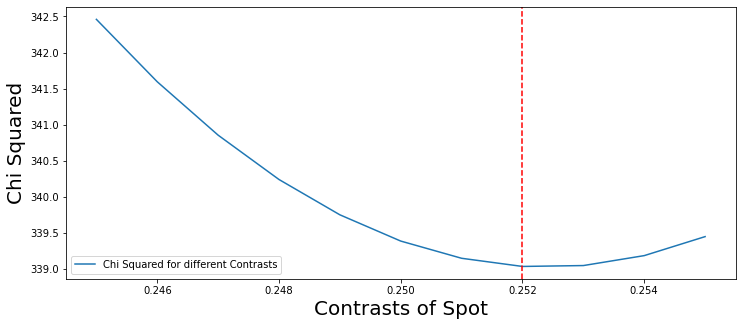

In [104]:
plt.figure(figsize=(12, 5))
plt.plot(guess_contrast, chi, label='Chi Squared for different Contrasts')
plt.xlabel("Contrasts of Spot", fontsize=20)
plt.legend()
plt.ylabel("Chi Squared", fontsize=20)
plt.axvline(x=best_contrast, color='r', linestyle='--');

In [105]:
chi[7:9]

[339.0369890717014, 339.0493022653435]

In [106]:
min_chi

339.0369890717014

In [107]:
best_phase

45.3

In [108]:
best_contrast

0.252

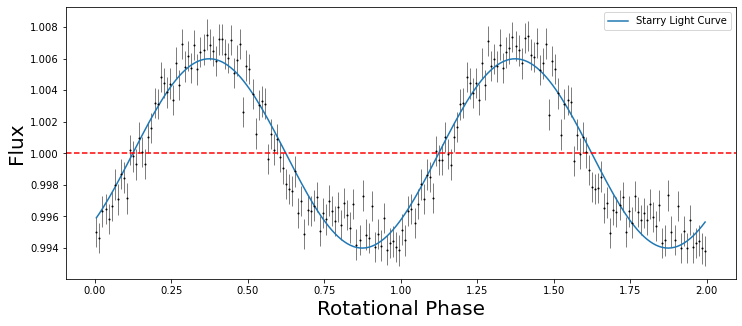

In [45]:
map = starry.Map(ydeg=30)
map.spot(contrast=best_contrast, radius=radius, lat=45, lon=best_phase)
map.inc = 30.0
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--');

In [46]:
print("The amplitude of the Starry Light Curve curve is " + str((np.amax(map.flux(theta=theta))-np.amin(map.flux(theta=theta)))/2))

The amplitude of the Starry Light Curve curve is 0.0059367153050717825


In [109]:
def sine_wave(meanPhase, meanFlux):
    
    N = int(len(meanFlux)/5)
    difference_array = np.absolute(np.subtract(meanFlux[:N],1)) 
    index = difference_array.argmin()

    amplitude = (np.amax(meanFlux) - np.amin(meanFlux))/2
    SineWave = (amplitude * np.sin((np.multiply(meanPhase,2*np.pi)) - (meanPhase[index]*2*np.pi))) + 1
    
    return SineWave, meanPhase[index]

SineWave, Tess_guess = sine_wave(meanPhase, meanFlux)

In [110]:
from scipy.optimize import leastsq

def least_squares(meanPhase, meanFlux, guess):
    
    t = np.multiply(meanPhase,2*np.pi)
    guess_mean = 1
    guess_phase = guess*2*np.pi
    guess_amp = np.amax(meanFlux)

    # Define the function to optimize, in this case, we want to minimize the difference
    # between the actual data and our "guessed" parameters
    optimize_func = lambda x: x[0]*np.sin(t-x[1]) + 1 - meanFlux
    est_amp, est_phase = leastsq(optimize_func, [guess_amp, guess_phase])[0]

    # recreate the fitted curve using the optimized parameters
    data_fit = est_amp*np.sin(t-est_phase) + 1
    
    print("The amplitude of the fitted curve is " + str(est_amp))
    
    return data_fit

data_fit = least_squares(meanPhase, meanFlux, Tess_guess)

The amplitude of the fitted curve is 0.006014826665932948


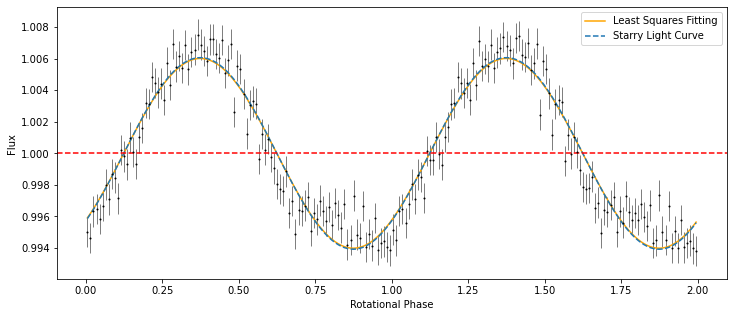

In [111]:
plt.figure(figsize=(12, 5))
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.plot(meanPhase, data_fit, label='Least Squares Fitting', color='orange', marker='', linestyle='-')
plt.plot(meanPhase, newFlux, label='Starry Light Curve', linestyle='--')
plt.legend()
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

In [50]:
guess_radius = np.linspace(1, 100, 100, endpoint=True)

In [51]:
chi = []

for radius in guess_radius:

    map = starry.Map(ydeg=30)
    map.spot(contrast=best_contrast, radius=radius, lat=45, lon=best_phase)
    map.inc = 30.0
    median = np.median(map.flux(theta=theta))
    newFlux = map.flux(theta=theta)/median

    residuals = (meanFlux - newFlux)/meanError
    chi_squared = np.sum(residuals**2)
    
    chi.append(chi_squared)
    
    if abs(chi_squared) <= abs(min_chi):
        min_chi = chi_squared
        best_radius = radius        


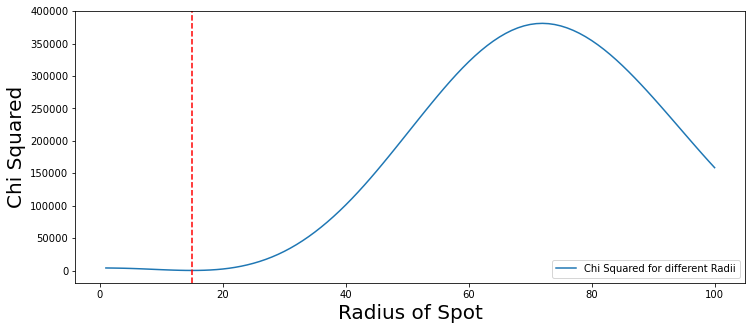

In [52]:
plt.figure(figsize=(12, 5))
plt.plot(guess_radius, chi, label='Chi Squared for different Radii')
plt.xlabel("Radius of Spot", fontsize=20)
plt.legend()
plt.ylabel("Chi Squared", fontsize=20)
plt.axvline(x=best_radius, color='r', linestyle='--');

In [53]:
best_radius

15.0

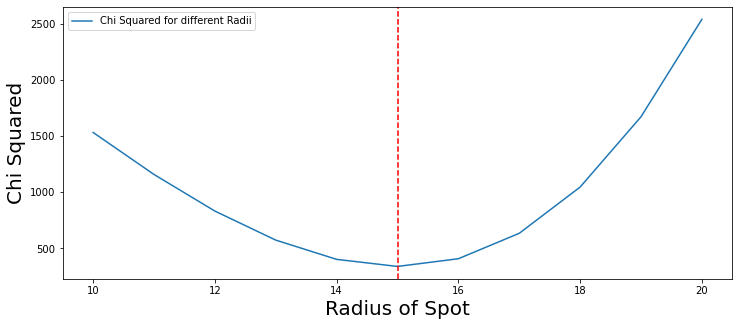

In [56]:
plt.figure(figsize=(12, 5))
plt.plot(guess_radius[9:20], chi[9:20], label='Chi Squared for different Radii')
plt.xlabel("Radius of Spot", fontsize=20)
plt.legend()
plt.ylabel("Chi Squared", fontsize=20)
plt.axvline(x=best_radius, color='r', linestyle='--');

In [57]:
guess_radius = np.linspace(1, 200, 200, endpoint=True)

In [58]:
chi = []

for radius in guess_radius:

    map = starry.Map(ydeg=30)
    map.spot(contrast=best_contrast, radius=radius, lat=45, lon=best_phase)
    map.inc = 30.0
    median = np.median(map.flux(theta=theta))
    newFlux = map.flux(theta=theta)/median

    residuals = (meanFlux - newFlux)/meanError
    chi_squared = np.sum(residuals**2)
    
    chi.append(chi_squared)
    
    if abs(chi_squared) <= abs(min_chi):
        min_chi = chi_squared
        best_radius = radius        


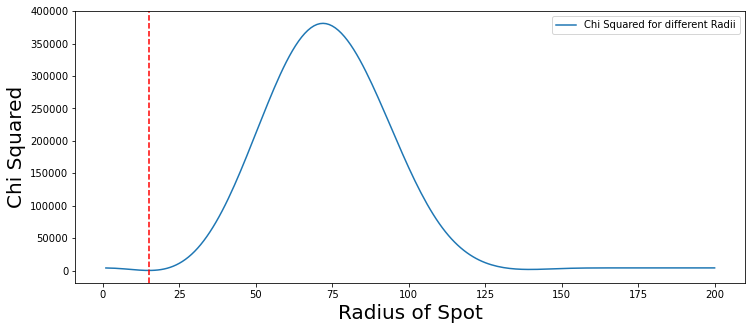

In [59]:
plt.figure(figsize=(12, 5))
plt.plot(guess_radius, chi, label='Chi Squared for different Radii')
plt.xlabel("Radius of Spot", fontsize=20)
plt.legend()
plt.ylabel("Chi Squared", fontsize=20)
plt.axvline(x=best_radius, color='r', linestyle='--');

In [66]:
np.argsort(chi)[:20] + 1


array([ 15,  14,  16,  13,  17,  12,  18,  11,  10,  19, 140, 139, 141,
         9, 138, 142, 137, 143, 144, 136], dtype=int64)

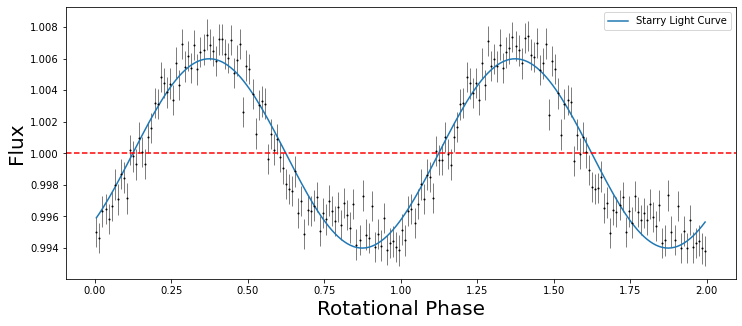

In [67]:
map = starry.Map(ydeg=30)
map.spot(contrast=best_contrast, radius=best_radius, lat=45, lon=best_phase)
map.inc = 30.0
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--');

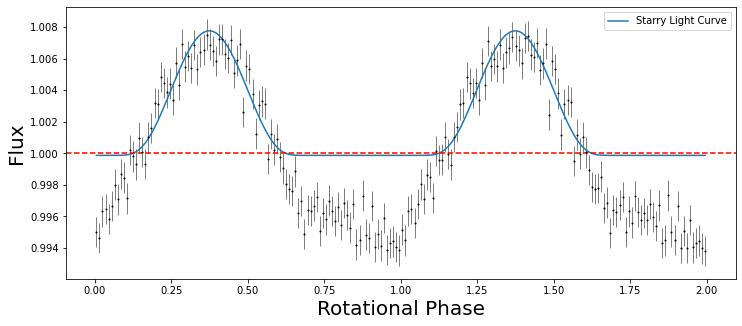

In [72]:
map = starry.Map(ydeg=30)
map.spot(contrast=best_contrast, radius=140, lat=45, lon=best_phase)
map.inc = 30.0
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--');

In [78]:
chi[139]

1878.286262173337

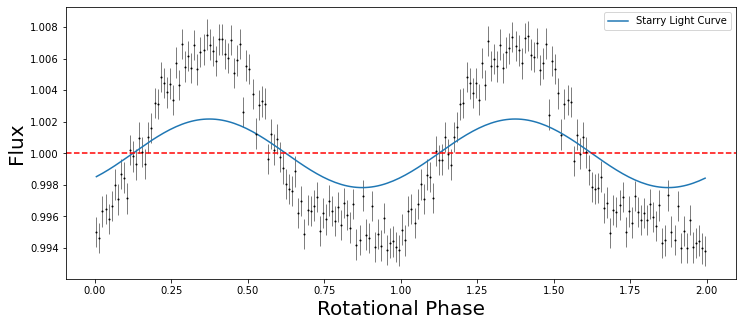

In [80]:
map = starry.Map(ydeg=30)
map.spot(contrast=best_contrast, radius=9, lat=45, lon=best_phase)
map.inc = 30.0
median = np.median(map.flux(theta=theta))
newFlux = map.flux(theta=theta)/median

plt.figure(figsize=(12, 5))

plt.plot(meanPhase, newFlux, label='Starry Light Curve')
plt.xlabel("Rotational phase", fontsize=20)
plt.legend()
plt.ylabel("Flux", fontsize=20)
plt.errorbar(meanPhase, meanFlux, yerr=meanError, color='black', marker='.', linestyle='none', markersize=2, elinewidth=0.5)
plt.xlabel('Rotational Phase')
plt.ylabel('Flux')
plt.axhline(y=1, color='r', linestyle='--');

In [112]:
guess_radius = np.linspace(15-0.5, 15+0.5, 11, endpoint=True)

min_chi = 10000

In [113]:
chi = []

for radius in guess_radius:

    map = starry.Map(ydeg=30)
    map.spot(contrast=best_contrast, radius=radius, lat=45, lon=best_phase)
    map.inc = 30.0
    median = np.median(map.flux(theta=theta))
    newFlux = map.flux(theta=theta)/median

    residuals = (meanFlux - newFlux)/meanError
    chi_squared = np.sum(residuals**2)
    
    chi.append(chi_squared)
    
    if abs(chi_squared) <= abs(min_chi):
        min_chi = chi_squared
        best_radius = radius        


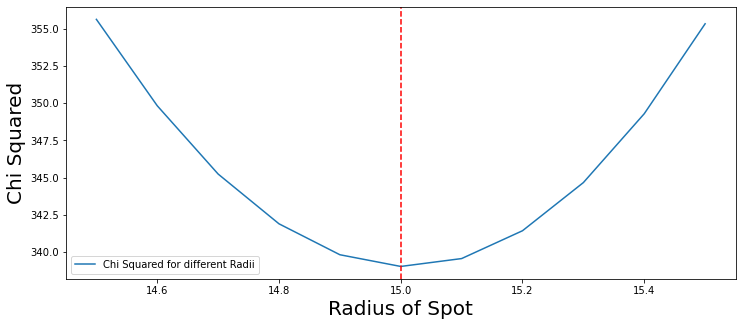

In [114]:
plt.figure(figsize=(12, 5))
plt.plot(guess_radius, chi, label='Chi Squared for different Radii')
plt.xlabel("Radius of Spot", fontsize=20)
plt.legend()
plt.ylabel("Chi Squared", fontsize=20)
plt.axvline(x=best_radius, color='r', linestyle='--');

In [115]:
guess_lat = np.linspace(-90, 90, 181, endpoint=True)

min_chi = 10000

In [116]:
chi = []

for lat in guess_lat:
        
    map = starry.Map(ydeg=30)
    map.spot(contrast=best_contrast, radius=best_radius, lat=lat, lon=best_phase)
    map.inc = 30.0
    median = np.median(map.flux(theta=theta))
    newFlux = map.flux(theta=theta)/median
    
    residuals = (meanFlux - newFlux)/meanError
    chi_squared = np.sum(residuals**2)
    
    chi.append(chi_squared)
    
    if abs(chi_squared) < abs(min_chi):
        min_chi = chi_squared
        best_lat = lat

best_lat

MemoryError: bad allocation

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(guess_radius, chi, label='Chi Squared for different Latitud')
plt.xlabel("Radius of Spot", fontsize=20)
plt.legend()
plt.ylabel("Chi Squared", fontsize=20)
plt.axvline(x=best_radius, color='r', linestyle='--');